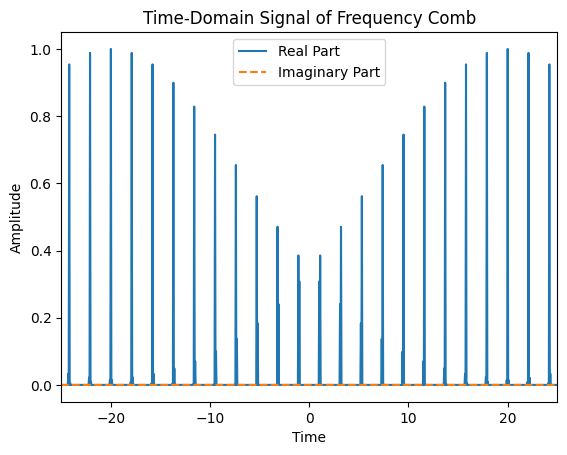

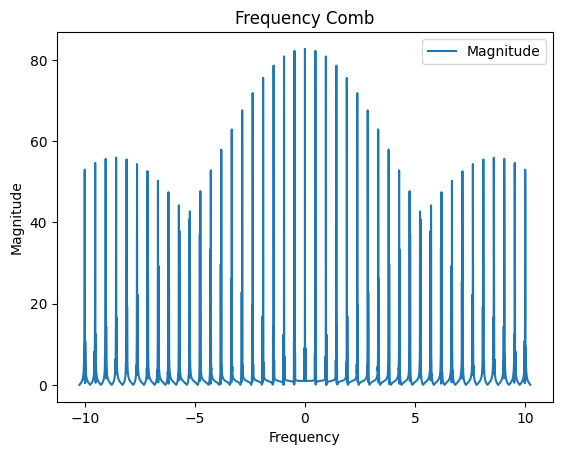

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Parameters
N = 2048*2              # Number of sample points
Tmax = 100.0           # Time window (arbitrary units)
dt = 2 * Tmax / N     # Time step
t = np.linspace(-Tmax, Tmax, N)

# Frequency comb parameters
frep = 10            # Repetition rate (spacing between comb lines, in arbitrary units)
n_combs = 10000          # Number of comb lines on each side of the central frequency

# Generate the frequency components for the comb
frequencies = np.array([k * frep for k in range(-n_combs, n_combs + 1)])

# Amplitude for each frequency component (all equal for simplicity)
#amplitudes = np.ones_like(frequencies)
# Amplitude for each frequency component (Gaussian profile)
center_index = n_combs  # Center index of the Gaussian
amplitudes = np.exp(-0.5 * ((np.arange(len(frequencies)) - center_index) / 20)**2)

# Generate the comb signal in the time domain
comb_signal = np.zeros_like(t, dtype=complex)
for frequency, amplitude in zip(frequencies, amplitudes):
    comb_signal += amplitude * np.exp(1j * 2 * np.pi * frequency * t) 

# Normalize the comb signal
comb_signal /= np.max(np.abs(comb_signal))

# Add the DC component
dc_component = 0.0  # Adjust this value as needed
comb_signal += dc_component

# Plot the time-domain signal
plt.figure()
plt.plot(t, np.real(comb_signal), label='Real Part')
plt.plot(t, np.imag(comb_signal), label='Imaginary Part', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(-25,25)
plt.legend()
plt.title('Time-Domain Signal of Frequency Comb')
plt.show()

# Perform FFT to get the frequency-domain signal
frequency_signal = np.fft.fft(comb_signal)
frequency = np.fft.fftfreq(N, dt)
# frequency, frequency_signal = periodogram(comb_signal,fs=len(comb_signal))
# frequency.shape, frequency_signal.shape
# Plot the frequency-domain signal (Magnitude)
plt.figure()
plt.plot(np.fft.fftshift(frequency), np.fft.fftshift(np.abs(frequency_signal)), label='Magnitude')
# plt.figure(frequency, frequency_signal, label='PSD')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Frequency Comb')
#plt.xlim(-200,200)
plt.legend()
plt.show()


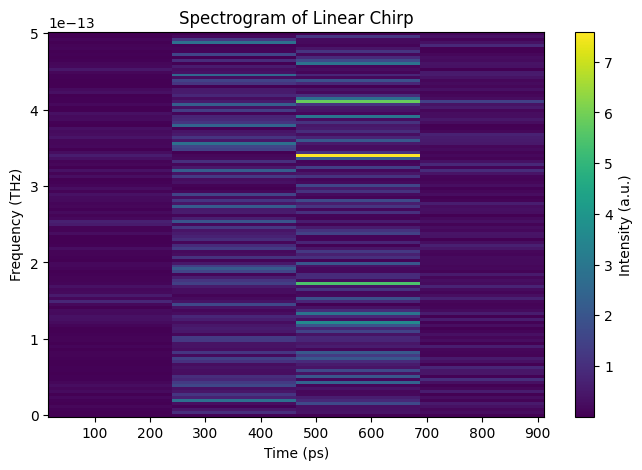

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

# Define pulse parameters
pulse_width = 10  # ps
center_frequency = 193.4  # THz (corresponds to 1550 nm light)
frequency_bandwidth = 1  # GHz

# Time vector
t = np.linspace(-pulse_width, pulse_width, 1000)

# Unchirped pulse (sinc function for envelope)
un_chirped_pulse = np.sinc(t / pulse_width)

# Linear chirp for chirped pulse
chirp_rate = frequency_bandwidth / pulse_width  # chirp rate (THz/ps)
instantaneous_frequency = center_frequency + chirp_rate * t

# Chirped pulse (frequency-shifted envelope)
chirped_pulse = un_chirped_pulse * np.cos(2 * np.pi * np.cumsum(instantaneous_frequency) * t)

# Spectrogram calculation
f, t_spec, Sxx = spectrogram(chirped_pulse, fs=1)


# Plot spectrogram
plt.figure(figsize=(8, 5))
plt.pcolormesh(t_spec, f / 1e12, Sxx)
plt.xlabel('Time (ps)')
plt.ylabel('Frequency (THz)')
plt.title('Spectrogram of Linear Chirp')
plt.colorbar(label='Intensity (a.u.)')
#plt.tight_layout()
plt.show()

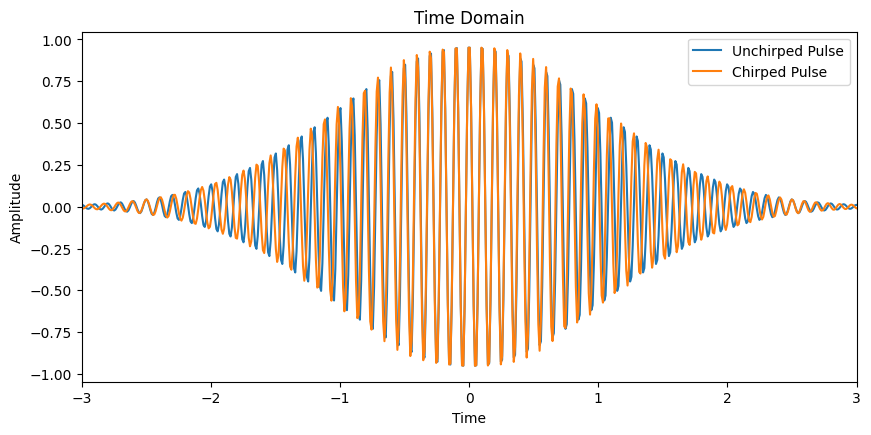

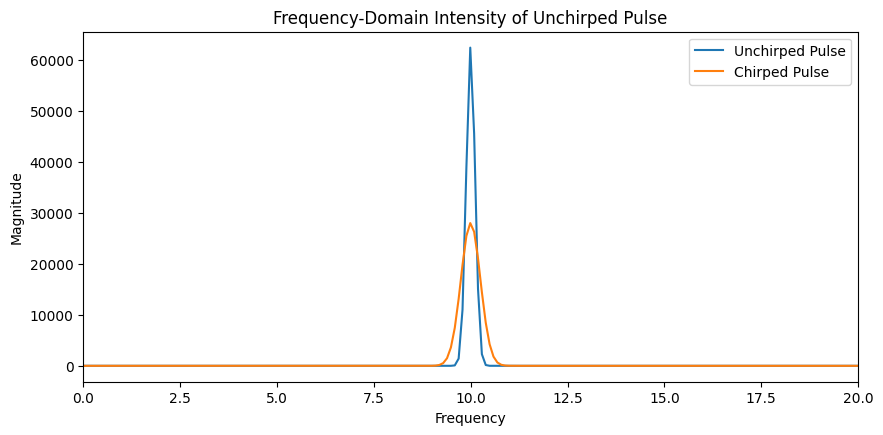

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate and plot the pulses
def plot_chirped_pulses(frequency=10, chirp_param=0.5, repetition_rate=1.0):
    # Parameters
    tau = 1.0  # Pulse width
    omega_0 = 2 * np.pi * frequency  # Central frequency (arbitrary units)
    C = chirp_param  # Chirp parameter
    T_rep = 1.0 / repetition_rate  # Repetition period

    # Time axis
    t = np.linspace(-5, 5, 1000)

    # Unchirped Gaussian pulse
    E_unchirped = np.exp(-t**2 / (2 * tau**2)) * np.exp(1j * omega_0 * t)

    # Chirped Gaussian pulse
    E_chirped = np.exp(-t**2 / (2 * tau**2)) * np.exp(1j * (omega_0 * t + C * t**2))

    # Plot time-domain intensity
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.plot(t, np.real(E_unchirped), label='Unchirped Pulse')
    plt.plot(t, np.real(E_chirped), label='Chirped Pulse')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.xlim(-3,3)
    plt.title('Time Domain')

    #plt.subplot(2, 1, 2)
    #plt.plot(t, np.real(E_chirped), label='Chirped Pulse')
    #plt.xlabel('Time')
    #plt.ylabel('Amplitude')
    #plt.legend()
    #plt.title('Chirped Gaussian Pulse')

    #plt.tight_layout()
    #plt.show()

    # Frequency domain representation using FFT
    frequencies = np.fft.fftfreq(len(t), t[1] - t[0])
    E_unchirped_fft = np.fft.fft(E_unchirped)
    E_chirped_fft = np.fft.fft(E_chirped)

    # Plot frequency-domain intensity
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 2)
    plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(np.abs(E_unchirped_fft)**2), label='Unchirped Pulse')
    plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(np.abs(E_chirped_fft)**2), label='Chirped Pulse')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.xlim(0,20)
    plt.legend()
    plt.title('Frequency-Domain Intensity of Unchirped Pulse')

    #plt.subplot(2, 1, 2)
    #plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(np.abs(E_chirped_fft)**2), label='Chirped Pulse')
    #plt.xlabel('Frequency')
    #plt.ylabel('Magnitude')
    #plt.legend()
    #plt.title('Frequency-Domain Intensity of Chirped Pulse')

    #plt.tight_layout()
    #plt.show()

# Example usage with variable frequency and chirp parameter
plot_chirped_pulses(frequency=10, chirp_param=1, repetition_rate=1.0)


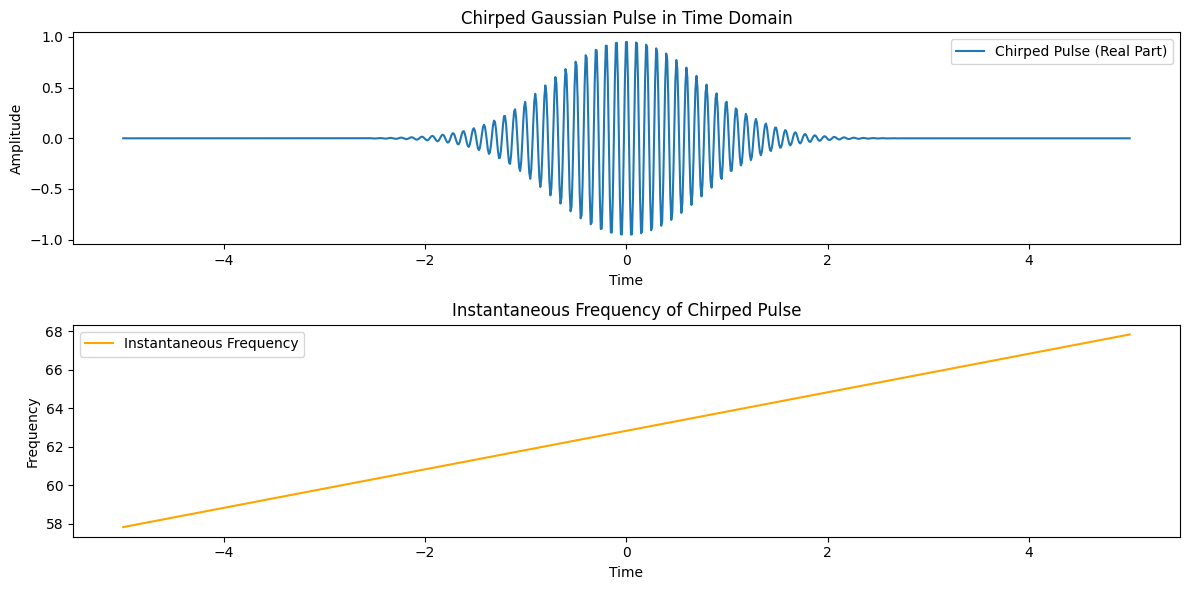

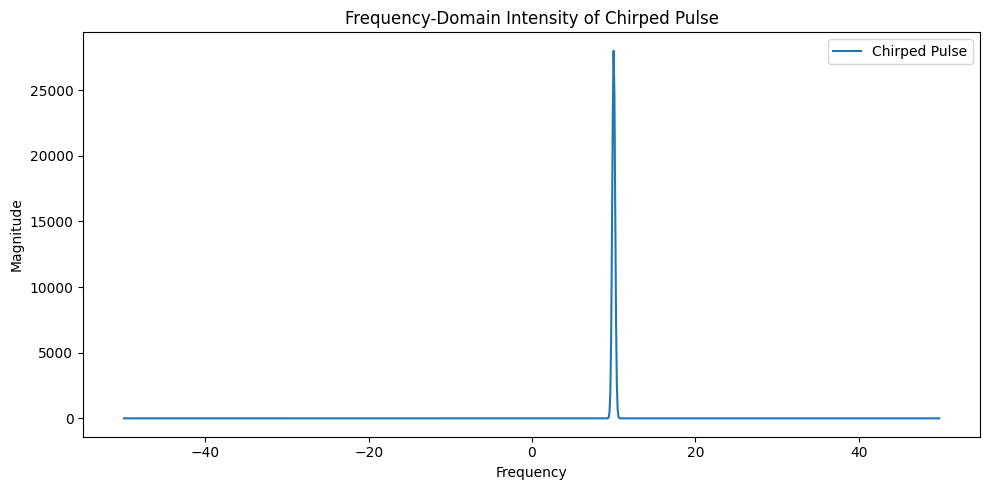

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_chirped_pulses(omega_0=2 * np.pi * 10, Gamma_1=1, Gamma_2=0.5):
    # Parameters
    t = np.linspace(-5, 5, 1000)  # Time axis
    Gamma = Gamma_1 - 1j * Gamma_2  # Complex Gauss parameter

    # Gaussian pulse with chirp
    E_t = np.exp(-Gamma * t**2) * np.exp(1j * omega_0 * t)

    # Instantaneous frequency
    phi_tot = omega_0 * t + Gamma_2 * t**2
    omega_t = omega_0 + 2 * Gamma_2 * t

    # Plot time-domain intensity and instantaneous frequency
    plt.figure(figsize=(12, 6))

    # Real part of the chirped pulse
    plt.subplot(2, 1, 1)
    plt.plot(t, np.real(E_t), label='Chirped Pulse (Real Part)')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title('Chirped Gaussian Pulse in Time Domain')

    # Instantaneous frequency
    plt.subplot(2, 1, 2)
    plt.plot(t, omega_t, label='Instantaneous Frequency', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Instantaneous Frequency of Chirped Pulse')

    plt.tight_layout()
    plt.show()

    # Frequency domain representation using FFT
    frequencies = np.fft.fftfreq(len(t), t[1] - t[0])
    E_t_fft = np.fft.fft(E_t)

    # Plot frequency-domain intensity
    plt.figure(figsize=(10, 5))
    plt.plot(np.fft.fftshift(frequencies), np.fft.fftshift(np.abs(E_t_fft)**2), label='Chirped Pulse')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.title('Frequency-Domain Intensity of Chirped Pulse')

    plt.tight_layout()
    plt.show()
    

# Example usage with specific Gamma_1 and Gamma_2
plot_chirped_pulses(omega_0=2 * np.pi * 10, Gamma_1=1, Gamma_2=0.5)


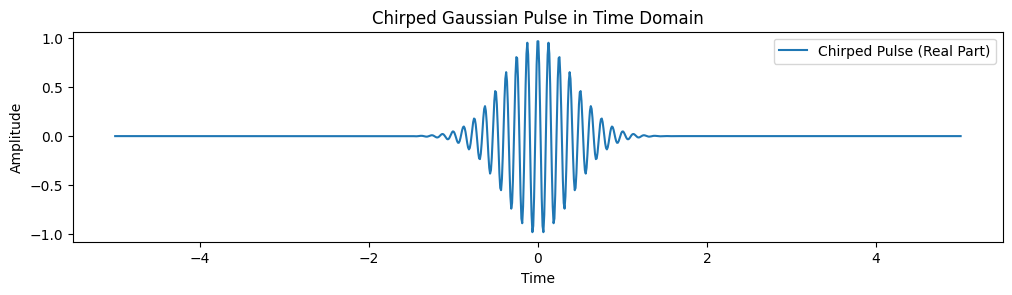

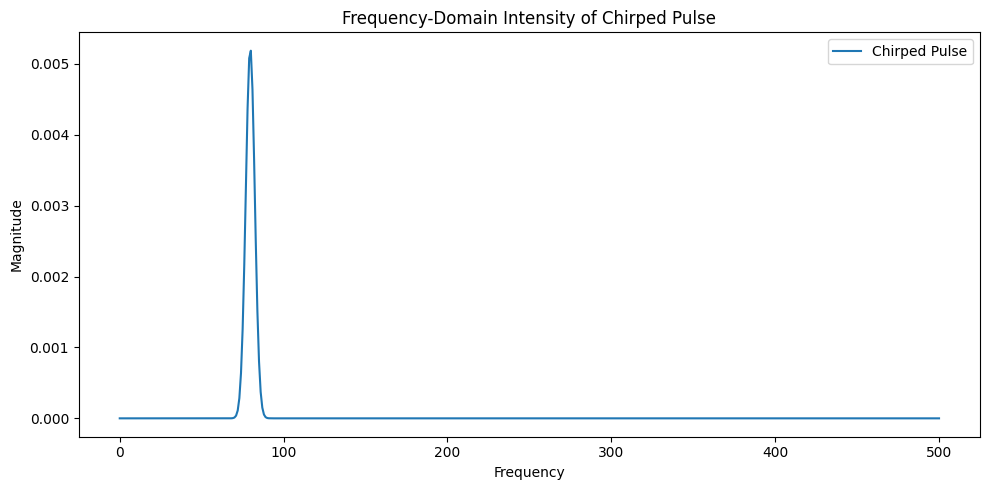

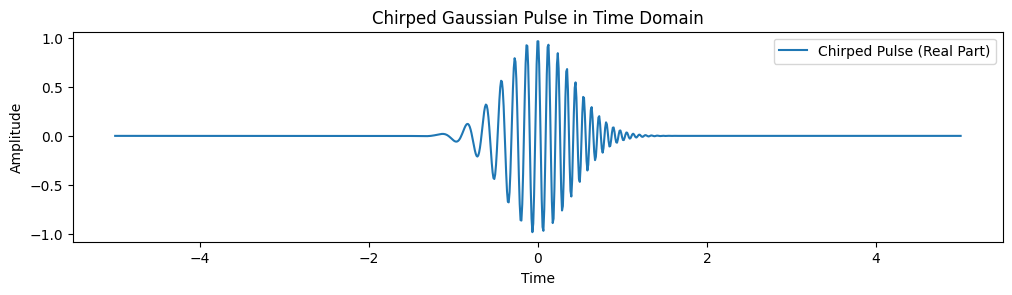

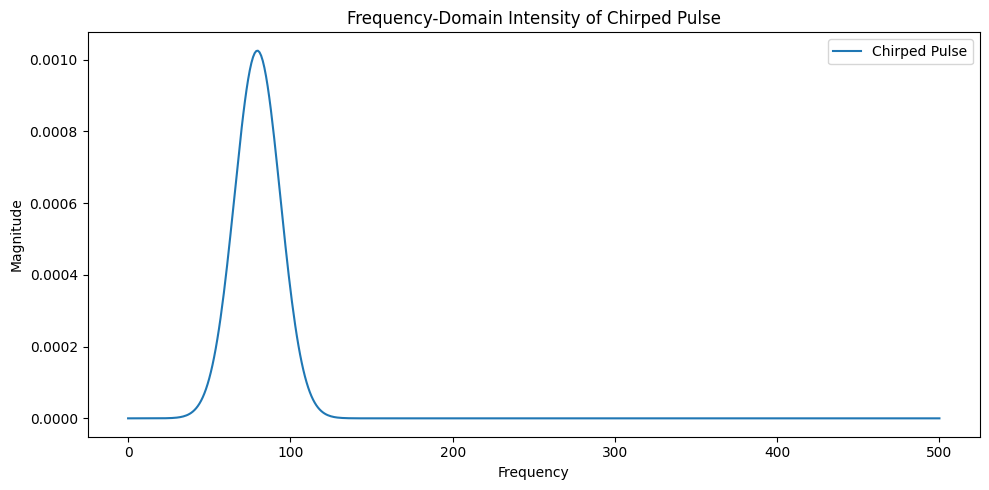

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, periodogram

def plot_chirped_pulses(omega_0=2 * np.pi * 100, Gamma_1=1, Gamma_2=0.5):
    # Parameters
    t = np.linspace(-5, 5, 1000)  # Time axis
    Gamma = Gamma_1 - 1j * Gamma_2  # Complex Gauss parameter

    # Gaussian pulse with chirp
    E_t = np.exp(-Gamma * t**2) * np.exp(1j * omega_0 * t)

    # Instantaneous frequency
    phi_tot = omega_0 * t + Gamma_2 * t**2
    omega_t = omega_0 + 2 * Gamma_2 * t

    # Plot time-domain intensity and instantaneous frequency
    plt.figure(figsize=(12, 6))

    # Real part of the chirped pulse
    plt.subplot(2, 1, 1)
    plt.plot(t, np.real(E_t), label='Chirped Pulse (Real Part)')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.title('Chirped Gaussian Pulse in Time Domain')

    # Instantaneous frequency
    # plt.subplot(2, 1, 2)
    # plt.plot(t, omega_t, label='Instantaneous Frequency', color='orange')
    # plt.xlabel('Time')
    # plt.ylabel('Frequency')
    # plt.legend()
    # plt.title('Instantaneous Frequency of Chirped Pulse')

    # plt.tight_layout()
    # plt.show()

    # # Frequency domain representation using FFT
    # frequencies = np.fft.fftfreq(len(t), t[1] - t[0])
    # E_t_fft = np.fft.fft(E_t)
    fxx,P=periodogram(np.real(E_t), fs = len(E_t))

    # Plot frequency-domain intensity
    plt.figure(figsize=(10, 5))
    plt.plot(fxx, P, label='Chirped Pulse')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.title('Frequency-Domain Intensity of Chirped Pulse')

    plt.tight_layout()
    plt.show()

    # Plot spectrogram
    # f, t_spec, Sxx = spectrogram(np.real(E_t), fs=1/(t[1] - t[0]), nperseg=128)
    
    # plt.figure(figsize=(10, 5))
    # plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
    # plt.colorbar(label='Intensity (dB)')
    # plt.xlabel('Time')
    # plt.ylabel('Frequency')
    # plt.title('Spectrogram of Chirped Gaussian Pulse')
    # plt.show()

# Example usage with specific Gamma_1 and Gamma_2
plot_chirped_pulses(omega_0=50, Gamma_1=3, Gamma_2=0)
plot_chirped_pulses(omega_0=50, Gamma_1=3, Gamma_2=15)


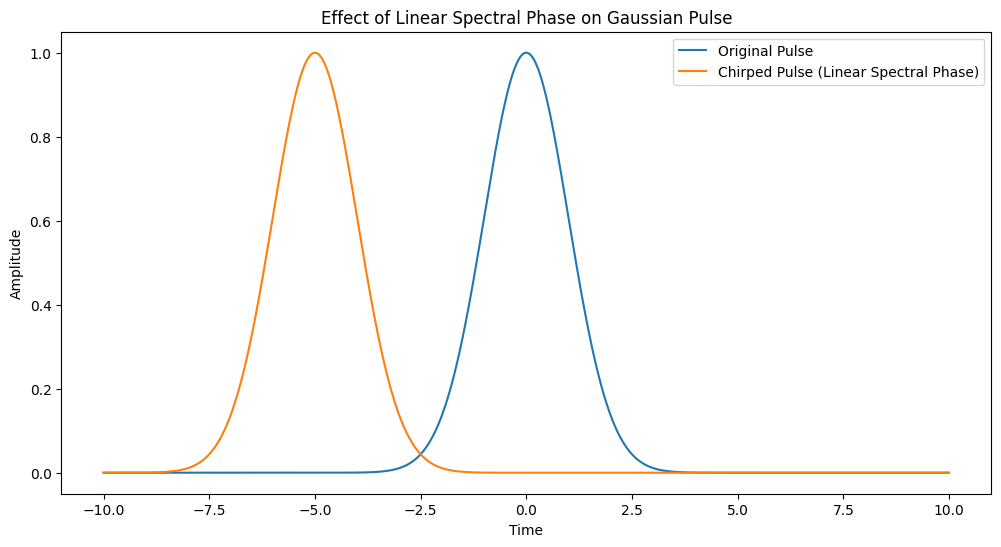

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_pulse(t, t0, width):
    return np.exp(-(t - t0)**2 / (2 * width**2))

def apply_linear_spectral_phase(pulse, t, omega_0, phi_1):
    # Fourier transform of the pulse
    E_w = np.fft.fft(pulse)
    omega = np.fft.fftfreq(len(t), d=(t[1] - t[0])) * 2 * np.pi

    # Apply linear spectral phase
    E_w *= np.exp(1j * phi_1 * (omega - omega_0))

    # Inverse Fourier transform to get the time domain pulse
    return np.fft.ifft(E_w)

# Time axis
t = np.linspace(-10, 10, 1000)

# Gaussian pulse parameters
t0 = 0
width = 1
omega_0 = 0
phi_1 = 5  # Linear spectral phase term

# Generate Gaussian pulse
pulse = gaussian_pulse(t, t0, width)

# Apply linear spectral phase
chirped_pulse = apply_linear_spectral_phase(pulse, t, omega_0, phi_1)

# Plot the original and chirped pulses
plt.figure(figsize=(12, 6))
plt.plot(t, np.real(pulse), label='Original Pulse')
plt.plot(t, np.real(chirped_pulse), label='Chirped Pulse (Linear Spectral Phase)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Effect of Linear Spectral Phase on Gaussian Pulse')
plt.show()


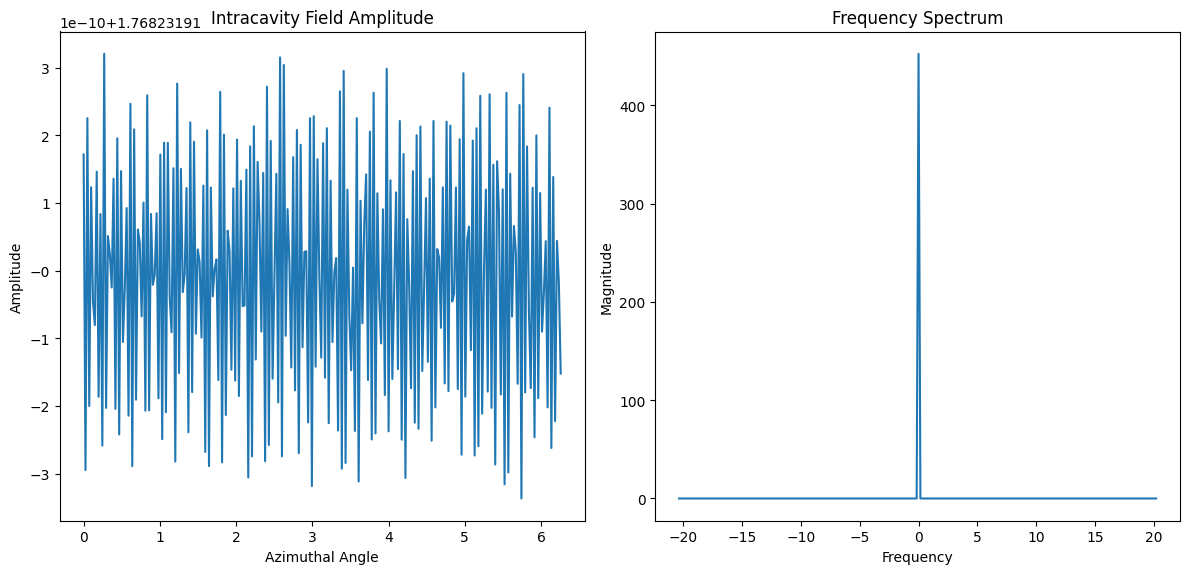

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.1   # Loss
delta = 2.0   # Detuning
beta2 = -1.0  # Group velocity dispersion
F = 2.0       # Pump field amplitude
L = 2 * np.pi # Length of the resonator (2π for simplicity)
N = 256       # Number of discretization points
T = 200       # Total simulation time
dt = 0.001     # Time step
dz = L / N    # Spatial step

# Spatial grid
theta = np.linspace(0, L, N, endpoint=False)

# Initialize field (small random noise)
E = np.random.randn(N) * 0.01 + 1j * np.random.randn(N) * 0.01

# Function to compute the nonlinear term
def nonlinear_term(E):
    return 1j * np.abs(E)**2 * E

# Function to compute the dispersion term
def dispersion_term(E):
    k = np.fft.fftfreq(N, dz) * 2 * np.pi
    D = np.exp(-0.5 * 1j * beta2 * k**2 * dt)
    return np.fft.ifft(D * np.fft.fft(E))

# Time evolution
for t in range(int(T / dt)):
    # Apply dispersion term
    E = dispersion_term(E)
    # Apply nonlinear term and pump term
    E = E + dt * (F - (alpha + 1j * delta) * E + nonlinear_term(E))

# Plot the intracavity field amplitude
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(theta, np.abs(E))
plt.title('Intracavity Field Amplitude')
plt.xlabel('Azimuthal Angle')
plt.ylabel('Amplitude')

# Plot the spectrum
spectrum = np.fft.fftshift(np.fft.fft(E))
frequencies = np.fft.fftshift(np.fft.fftfreq(N, dz))
plt.subplot(1, 2, 2)
plt.plot(frequencies, np.abs(spectrum))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
delta = -2.0  # Detuning parameter
F = 1.0       # Pump field amplitude
theta = np.linspace(0, 2 * np.pi, 1024)  # Discretized azimuthal angle
dt = 0.1      # Time step

# Initial condition (e.g., small random noise)
A0 = 0.01 * (np.random.rand(len(theta)) + 1j * np.random.rand(len(theta)))


In [2]:
def lle_rhs(t, A, delta, F, d_theta):
    A = A.reshape((-1,))
    d2A_dtheta2 = np.fft.ifft(- (np.fft.fftfreq(len(A), d_theta)**2) * np.fft.fft(A))
    dA_dt = (-1 + 1j * (np.abs(A)**2 - delta) + 1j * d2A_dtheta2) * A + F
    return dA_dt.flatten()


In [3]:
t_span = (0, 100)  # Time range for integration
sol = solve_ivp(lle_rhs, t_span, A0.flatten(), args=(delta, F, theta[1] - theta[0]), method='RK45', t_eval=np.arange(0, 100, dt))

# Reshape the solution for easier handling
A_sol = sol.y.view(dtype=np.complex128).reshape((len(theta), -1))


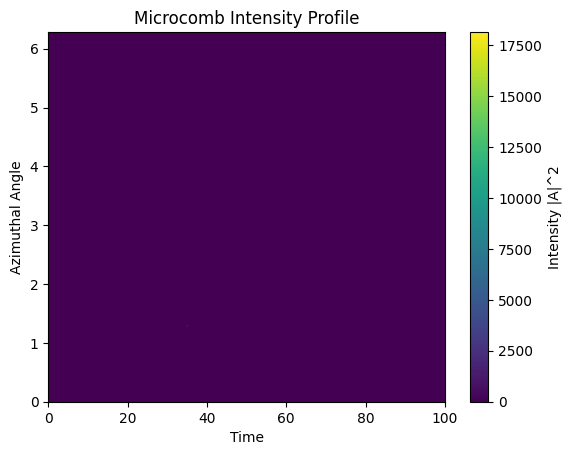

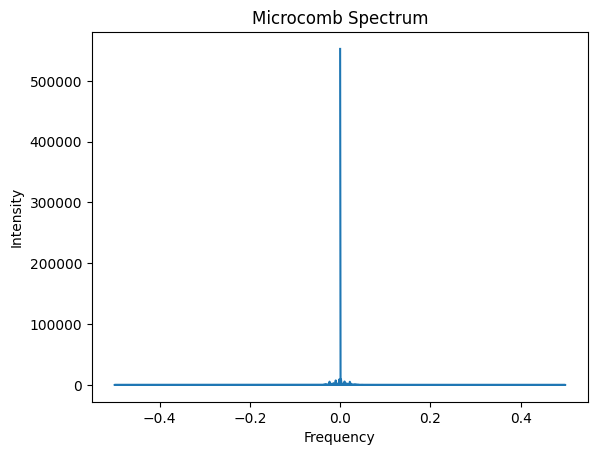

In [4]:
# Plot the intensity profile over time
plt.imshow(np.abs(A_sol)**2, aspect='auto', extent=[0, 100, 0, 2 * np.pi])
plt.colorbar(label='Intensity |A|^2')
plt.xlabel('Time')
plt.ylabel('Azimuthal Angle')
plt.title('Microcomb Intensity Profile')
plt.show()

# Plot the spectrum at the final time step
plt.plot(np.fft.fftfreq(len(theta)), np.abs(np.fft.fft(A_sol[:, -1]))**2)
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.title('Microcomb Spectrum')
plt.show()


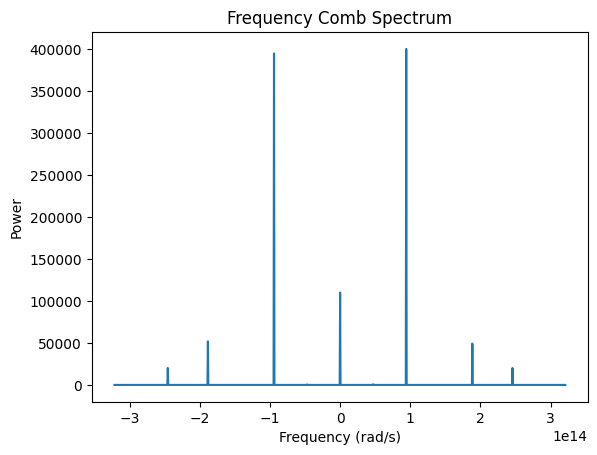

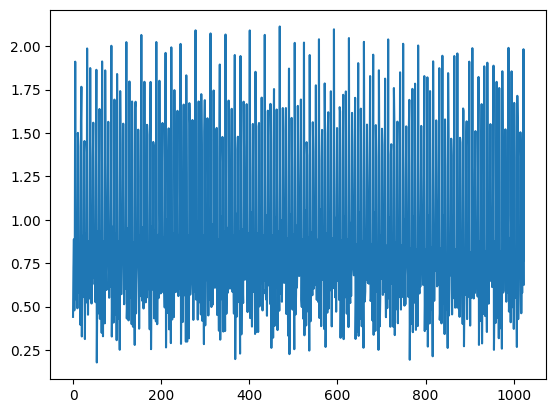

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift

# Define parameters
N = 1024  # Number of points
T = 10e-12  # Total simulation time
dt = T / N  # Time step
dz = 0.01  # Propagation step
Nz = 1000  # Number of steps
beta2 = -0.01  # Group velocity dispersion (negative for anomalous dispersion)
gamma = 1.0  # Nonlinearity
L = 1.0  # Length of the cavity
F = 1.0  # Pump field
delta = -1.5  # Detuning

# Define time and frequency arrays
t = np.linspace(-T/2, T/2, N)
omega = 2 * np.pi * np.fft.fftfreq(N, dt)

# Initial field with a small perturbation
E = np.sqrt(F) * (1 + 0.01 * np.random.randn(N))

# SSFM loop
for _ in range(Nz):
    # Nonlinear step
    E = E * np.exp(1j * (gamma * np.abs(E)**2 - delta) * dz / 2)
    
    # Fourier transform to frequency domain
    E = fft(E)
    
    # Linear step (dispersion)
    E = E * np.exp(-1j * beta2 / 2 * omega**2 * dz)
    
    # Inverse Fourier transform back to time domain
    E = ifft(E)
    
    # Nonlinear step
    E = E * np.exp(1j * (gamma * np.abs(E)**2 - delta) * dz / 2)

# Compute the comb spectrum
spectrum = np.abs(fftshift(fft(E)))**2

# Plot the comb spectrum
plt.plot(fftshift(omega), spectrum)
plt.xlabel('Frequency (rad/s)')
plt.ylabel('Power')
plt.title('Frequency Comb Spectrum')
plt.show()


plt.plot(np.abs(E))
plt.show()

In [ ]:
!pip install tqdm

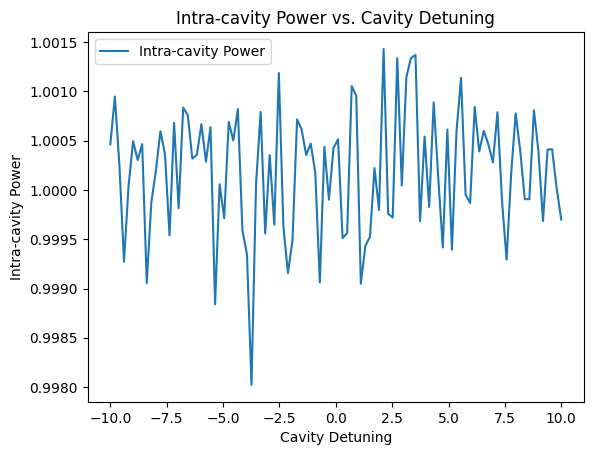

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from tqdm import tqdm

# Define parameters
N = 1024  # Number of points
T = 10e-12  # Total simulation time
dt = T / N  # Time step
dz = 0.01  # Propagation step
Nz = 1000  # Number of steps
beta2 = -0.01  # Group velocity dispersion (negative for anomalous dispersion)
gamma = 1.0  # Nonlinearity
L = 1.0  # Length of the cavity
F = 1.0  # Pump field

# Define time and frequency arrays
t = np.linspace(-T/2, T/2, N)
omega = 2 * np.pi * np.fft.fftfreq(N, dt)

def simulate_ssfm(delta):
    # Initial field with a small perturbation
    E = np.sqrt(F) * (1 + 0.01 * np.random.randn(N))

    # SSFM loop
    for _ in range(Nz):
        # Nonlinear step
        E = E * np.exp(1j * (gamma * np.abs(E)**2 - delta) * dz / 2)
        
        # Fourier transform to frequency domain
        E = fft(E)
        
        # Linear step (dispersion)
        E = E * np.exp(-1j * beta2 / 2 * omega**2 * dz)
        
        # Inverse Fourier transform back to time domain
        E = ifft(E)
        
        # Nonlinear step
        E = E * np.exp(1j * (gamma * np.abs(E)**2 - delta) * dz / 2)
    
    # Compute the intra-cavity power
    power = np.abs(E)**2
    avg_power = np.mean(power)
    return avg_power

# Sweep detuning values
deltas = np.linspace(-10, 10, 100)
powers = [simulate_ssfm(delta) for delta in tqdm(deltas, ncols=120)]

# Plot intra-cavity power vs. detuning
plt.plot(deltas, powers, label='Intra-cavity Power')
plt.xlabel('Cavity Detuning')
plt.ylabel('Intra-cavity Power')
plt.title('Intra-cavity Power vs. Cavity Detuning')
plt.legend()
plt.show()


In [1]:
import pyLLE

resonator = {'R':23e-6,
             'Qi':1e6,
             'Qc':1e6,
             'γ':1.55,
             'dispfile':'RW1000_H430.csv'}

************************************************************
Julia solver:
c:\Users\viswa\OneDrive - Danmarks Tekniske Universitet\Codes\base1\Lib\site-packages\pyLLE\ComputeLLE.jl
************************************************************


In [2]:
import numpy as np
sim = {'Pin':150e-3,
       'Tscan': 1e6,
       'f_pmp':191e12,
       'δω_init':2e9*2*np.pi,
       'δω_end':-8e9*2*np.pi,
       'μ_fit':[-71,180],
       'μ_sim': [-71,170],
       'u':170}


solver = pyLLE.LLEsolver(sim=sim, res=resonator)

/!\ Simulation modes length need to be odd
Modification of the simulation modes suchat that:
μ_sim = [-71 170]


In [3]:
solver.Analyze(plot=True, plottype='all')

FigureWidget({
    'data': [{'legendgroup': 'Pump #0',
              'mode': 'markers',
              'name': 'FEM Simulation',
              'type': 'scatter',
              'uid': '85f057b0-6350-42f1-8a3e-0a8077530793',
              'x': array([147.17537349, 148.35415506, 149.52034984, ..., 586.1284207 ,
                          587.07723172, 588.02581263]),
              'y': array([-2268.40723914, -2083.76989416, -1911.71933255, ..., -7697.82786679,
                          -7743.16107447, -7788.72438163])},
             {'legendgroup': 'Pump #0',
              'line': {'dash': 'dash', 'width': 2},
              'name': 'Fit',
              'type': 'scatter',
              'uid': 'add9f480-e2a4-43b7-8e82-0dd2a72badcd',
              'x': array([149.44378073, 150.43792495, 151.43206917, ..., 593.82624857,
                          594.82039279, 595.81453702]),
              'y': array([-2268.40723914, -2083.76989416, -1911.71933255, ..., -7697.82786679,
                          

In [4]:
solver.Setup()
solver.SolveTemporal(verbose=True)

----------------------------------------------------------------------
2024-07-16 16:55:06
Launching Julia....
Temp file can be found in: C:\Users\viswa\AppData\Local\Temp\tmpkql4f3h8log.log
Launching Julia: Done
Computing LLE [**************************************************] 100%

Simulation Time 00h:02min:26.1s
----------------------------------------------------------------------


In [5]:
solver.RetrieveData()

In [7]:
solver.PlotCombPower()

FigureWidget({
    'data': [{'name': 'Pcav',
              'type': 'scatter',
              'uid': '83fbead9-8be8-49be-ae44-5e72ea9cbb77',
              'x': array([  0.,   1.,   2., ..., 997., 998., 999.]),
              'y': array([2.18508610e-07, 2.76138863e-08, 6.37870420e-08, ..., 5.48767651e-08,
                          5.48765642e-08, 5.48763634e-08])},
             {'name': 'Pwg',
              'type': 'scatter',
              'uid': 'a7263cc3-b2e7-414b-b6cd-57c1b6c1b145',
              'x': array([  0.,   1.,   2., ..., 997., 998., 999.]),
              'y': array([0.15017506, 0.14994576, 0.15001413, ..., 0.14999984, 0.14999984,
                          0.14999984])},
             {'name': 'Pcomb',
              'type': 'scatter',
              'uid': '87d414d0-71f0-440c-b652-4b8d3cd7f4e6',
              'x': array([  0.,   1.,   2., ..., 997., 998., 999.]),
              'y': array([0., 0., 0., ..., 0., 0., 0.])}],
    'layout': {'template': '...', 'xaxis': {'title': {'text